# Evaluation der Forumtracking-Trajektorienbündel


# 1. Preprocessing

In [1]:
#imports

import numpy as np
from scipy.optimize import least_squares
from matplotlib import pyplot as plt

from sklearn.gaussian_process.kernels import RBF, Matern
import h5py

source_dataset = "../Datasets/Dataset_forumtracking.hdf5"
final_dataset = "forumtracking.hdf5"

max_trajectory_length = 100
max_nr_trajectories = 100
filter_parameter = ("", 3)

origin = "4"

%run preprocessing.py
# defines:
# filter_by_origin(path, goal, target=None)
# filter_by_length(path, length, target=None)
# filter_by_number(path, number, target=None)
# filter_trajectory(data, kind=None, windowsize=3)
# adjust_trajectory_length(trajectory, length)
# dp_algorithm(tolerance, trajectory)
# dp_cost_function(tolerance, trajectory)
# process_trajectory(trajectory, length, filter_parameter)

/home/clemens/.anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filter_by_origin(source_dataset, origin, target="forumtracking_reduced.hdf5")
filter_by_length("forumtracking_reduced.hdf5", max_trajectory_length, target=final_dataset)
#filter_by_number("forumtracking_short.hdf5", max_nr_trajectories, target=final_dataset)

os.remove("forumtracking_reduced.hdf5")
#os.remove("forumtracking_short.hdf5")
print("Done")

Done


In [3]:
i = 0
with h5py.File(final_dataset, "r") as f:
    count_total = f.attrs["TotalNrTrajectories"]
    X_forum = np.zeros((count_total, max_trajectory_length,2))
    y_forum = np.zeros((count_total,))
    for goal in f:
        for traj in f[goal]:
            trajectory = process_trajectory(f[goal+"/"+traj+"/Positions"][:], \
                                                  max_trajectory_length, \
                                                  filter_parameter)
            X_forum[i] = trajectory
            y_forum[i] = int(goal)
            i += 1

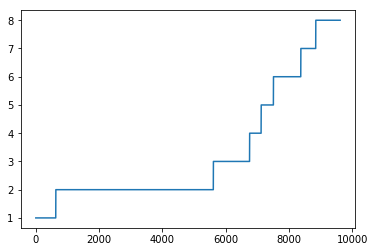

In [4]:
plt.plot(y_forum)
plt.show()

# 2.  Mean-Berechnung

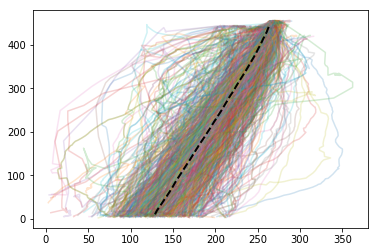

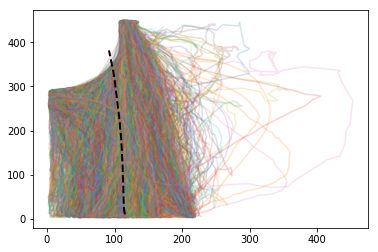

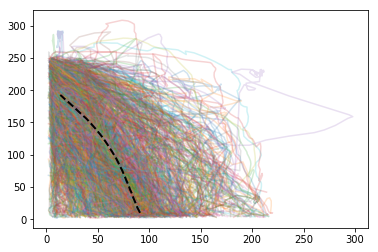

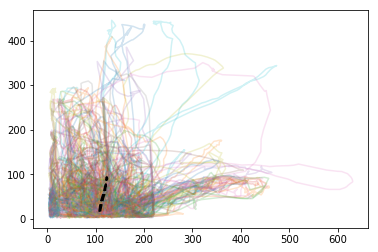

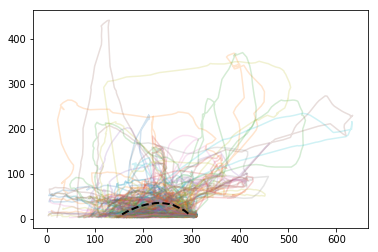

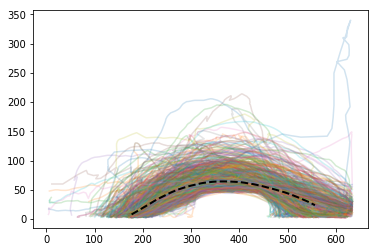

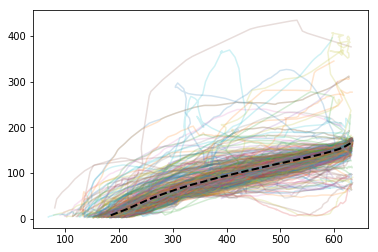

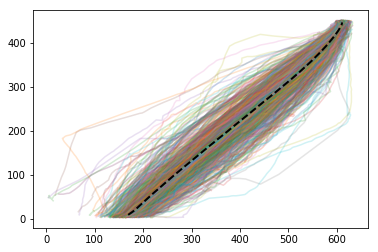

In [5]:
means = np.zeros((8,100,2))

for target in range(1,9):
    
    data = X_forum[np.where(y_forum==target)]

    for i in range(len(data)):
        plt.plot(data[i,:,0], data[i,:,1],alpha=0.2)

    mx = np.mean(data[:,:,0],axis=0)
    my = np.mean(data[:,:,1],axis=0)
    means[target-1,:,0] = mx
    means[target-1,:,1] = my
    mean = np.vstack([mx,my]).T
    
    std = np.zeros(len(mean))

    plt.plot(mx,my,linewidth=2,c="k",linestyle="--")

    plt.show()
    
    
    

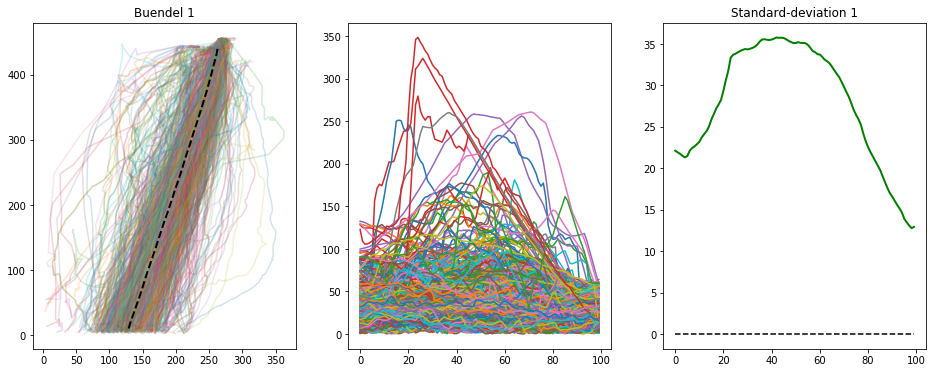

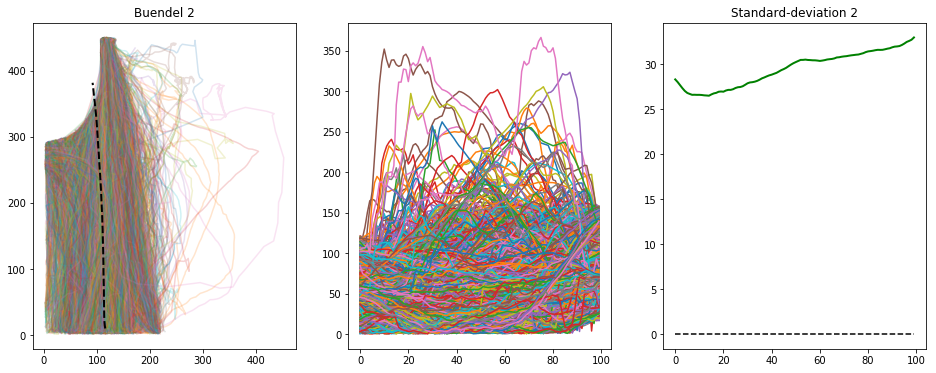

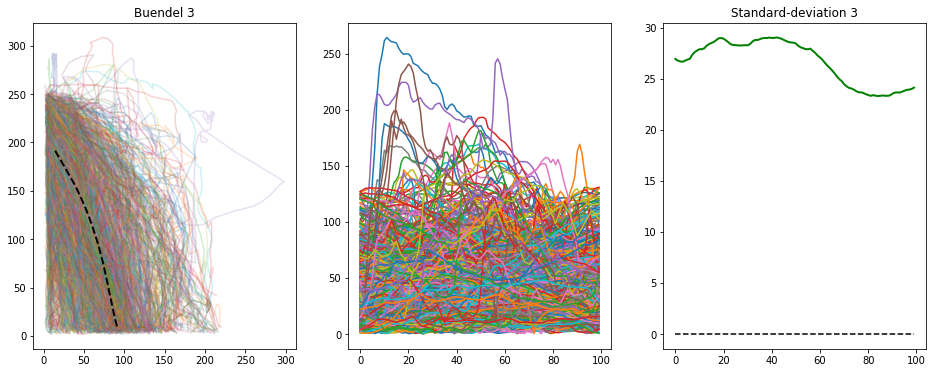

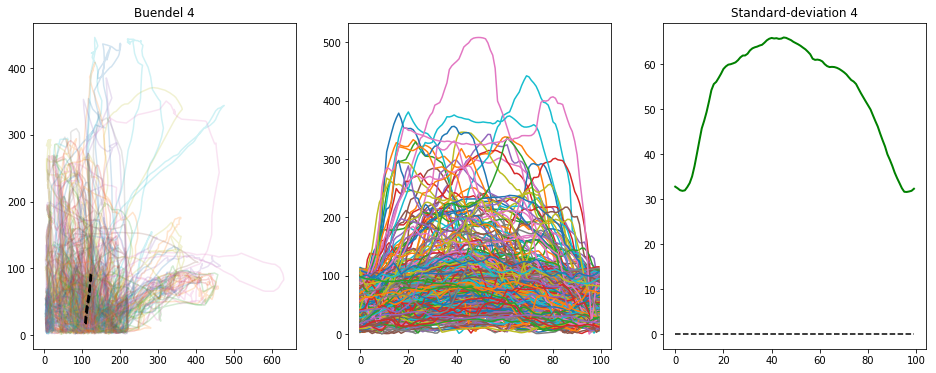

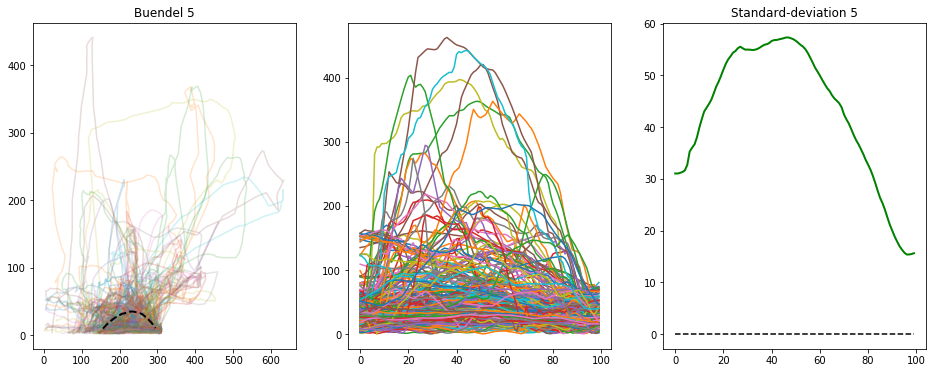

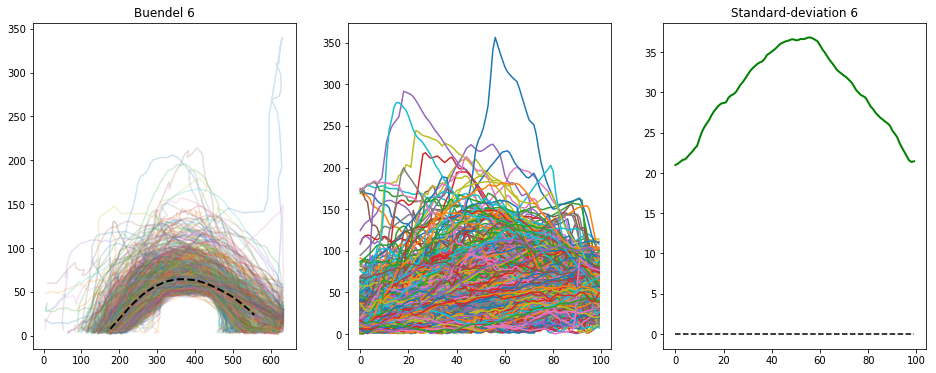

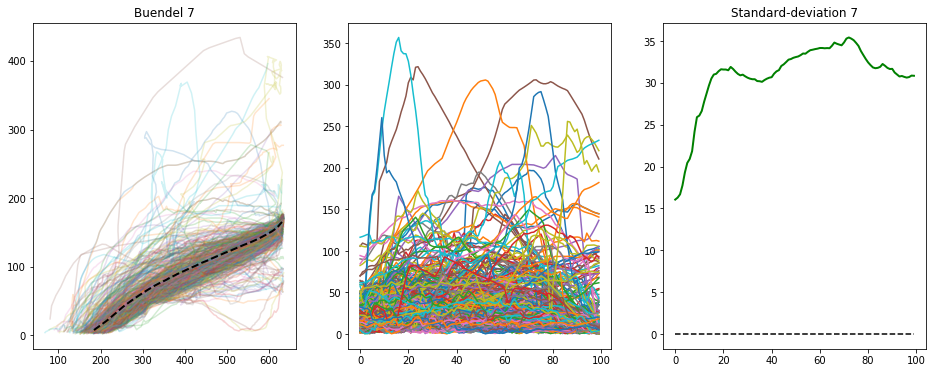

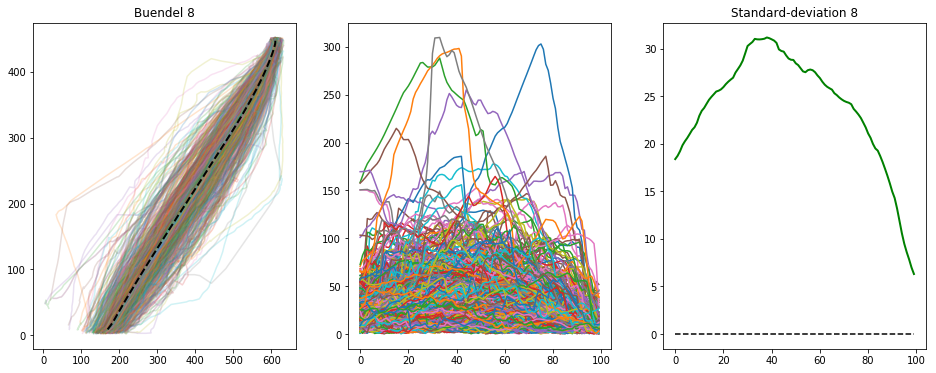

In [44]:
means = np.zeros((8,max_trajectory_length,2))
std = np.zeros((8,max_trajectory_length))
for target in range(1,9):    
    data = X_forum[np.where(y_forum==target)]
    mean_free_data = np.zeros((data.shape[0],data.shape[1]))
    mx = np.mean(data[:,:,0],axis=0)
    my = np.mean(data[:,:,1],axis=0)
    mean = np.vstack([mx,my]).T
    means[target-1] = mean
    
    for i in range(data.shape[0]):
        mean_free_data[i] = np.linalg.norm(data[i,:]-mean,axis=1)
        
    std[target-1] = np.std(mean_free_data,axis=0)
    
    fig = plt.figure(figsize=(16,6))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)        
    for i in range(data.shape[0]):
        ax1.plot(data[i,:,0], data[i,:,1],alpha=0.2)
        ax2.plot(mean_free_data[i,:])        
    ax3.plot(std[target-1],c="g",linewidth=2)
    ax1.plot(mx,my,linewidth=2,c="k",linestyle="--")
    ax3.plot([0]*max_trajectory_length,c="k",linestyle="--")
    ax1.set_title("Buendel "+str(target))
    ax3.set_title("Standard-deviation "+str(target))
    plt.show()
    
np.save("mean_per_bundle.npy",means)
np.save("std_per_bundle.npy",std)